# Linear Regression

In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Table of contents

[1. Introduction](#intro)
<br>

[2. lmplot](#lm)
- [Logistic](#log)
<br>

[3. Residplot](#resid)

## <a id = 'intro'> Introduction</a>
There are two variables that haven't been mentioned in the last notebooks, yet they might be useful in some situations. 

These functions are `lmplot()` and `regplot()`. The former is a `flf` and the latter its `alf`.

As we've already discussed, I'll be using the `flf` in the tutorial since it is the recommended thing to do.

## <a id = 'lm'>lmplot</a>
As we saw in the notebook *2. Visualizing statistical regression* we may want to plot two variables to see how they are related. One of the most used plots to do so is the `scatterplot()` for continous variables.

In [5]:
tips = sns.load_dataset('tips')
tips.head(6)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


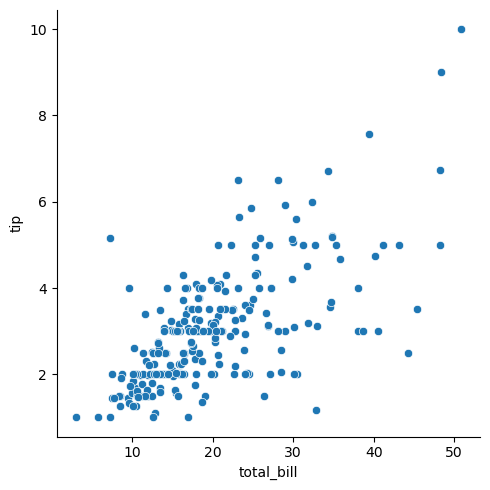

In [13]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip',  kind = 'scatter')

Even though *Seaborn* is neither an statistical, nor Machine Learning library (and should not be used with that purpose), it offers the `lmplot()` which is able to plot a simple linear regression to the plot to see better how the two plotted variables are related.

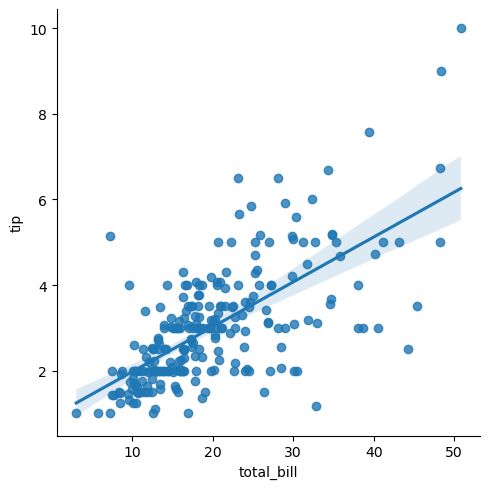

In [12]:
sns.lmplot(data=tips, x="total_bill", y="tip")

### x_estimator
`lmplot()` is usually used for `x` continuous variables (`y` could be binary as we'll see in the [logistic](#log) section).

In case we have `x` as a **discrete** varible, `x_estimator` might help us to visualize better the estimation.

Text(0.5, 1.05, 'without x_estimator')

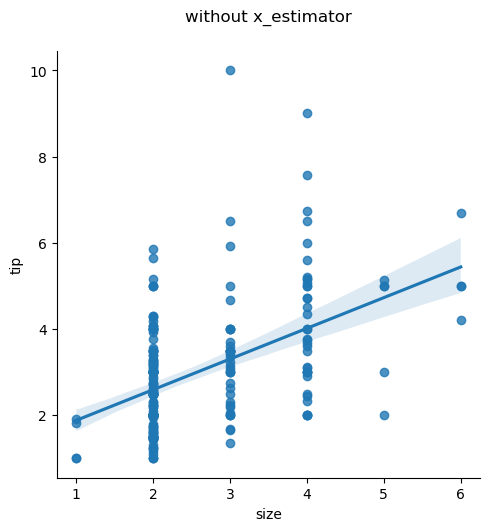

In [20]:
g = sns.lmplot(data=tips, x="size", y="tip")
g.ax.set_title('without x_estimator', y = 1.05)

Text(0.5, 1.05, 'wit x_estimator')

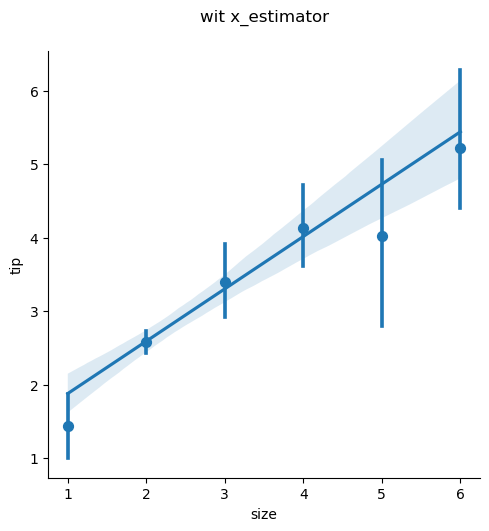

In [23]:
g = sns.lmplot(data = tips, x="size", y="tip", x_estimator = np.mean)
g.ax.set_title('wit x_estimator', y = 1.05)

### ci
The `ci`(confident interval) is responsible of drawing  that blue area around the regression fit. We can remove it by setting `ci = None`.

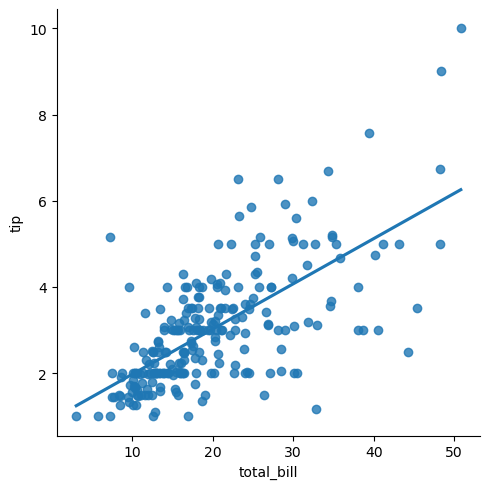

In [24]:
sns.lmplot(data=tips, x="total_bill", y="tip", ci = None)

### x_ci
If instead of plotting the **ci** we want to plot the **std** (standard deviation) we can set `x_ci = 'sd`.

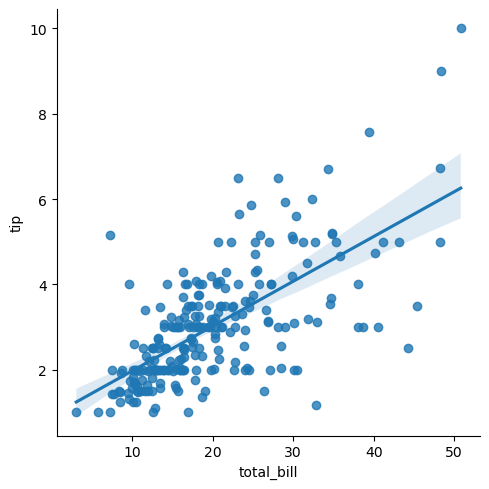

In [25]:
sns.lmplot(data=tips, x="total_bill", y="tip", x_ci = 'sd')

### line_kws

Maybe, a line with a different color allows us to visualize a little bit better the fitted line.

`line_kws` allows us to cutomize this fitted line.

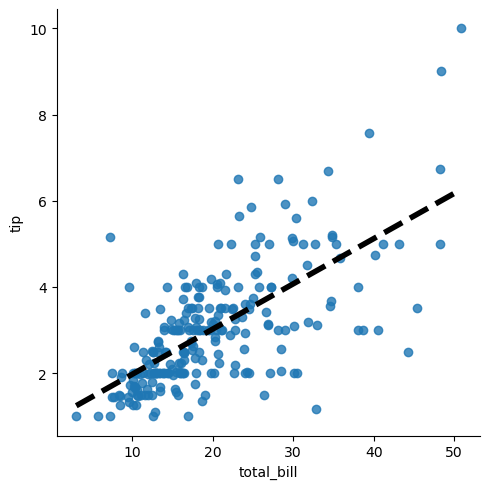

In [28]:
sns.lmplot(data=tips, x="total_bill", y="tip", ci = None,
          line_kws = dict(lw = 4, ls = '--', color = 'k'))

### scatter_kws

Another possibility, is that instead of modifying the fitted line (or additionaly to do so) we want to customize how the **scatterplot** is presented.

We can do this with the `scatter_kws` attribute.

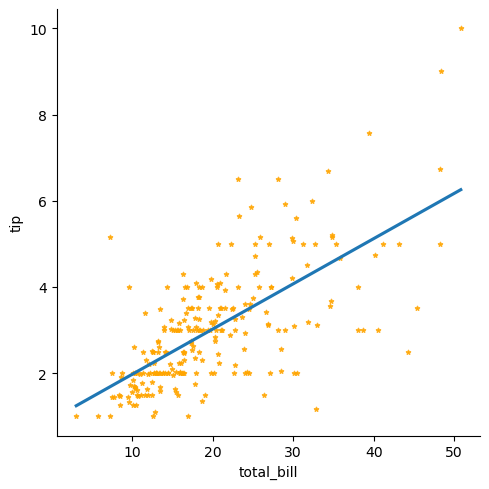

In [46]:
# I don't know why size is passed as 's' and not as 'size'
sns.lmplot(data=tips, x="total_bill", y="tip", ci = None, markers = '*',
          scatter_kws = dict(s = 10, color = 'orange'))

### scatter
What if we only want the fitted line? 

In case we don't want a scatterplot, we can set `scatter = False` to remove it.

Text(0.5, 1.07, 'Only the fitted line')

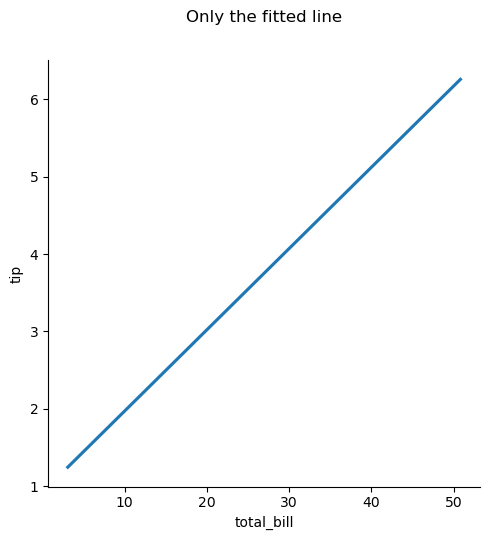

In [52]:
g = sns.lmplot(data=tips, x="total_bill", y="tip", scatter = False,
          ci = None)

g.ax.set_title('Only the fitted line', y = 1.07)

###  <a id = 'log'>logistic </a>
If our `y` variable is binary, we can set `logistic = True` to make a **logistic regression** instead of a linear one.

>**Note**: Since `logistic` is computationally intensive, you might want to keep the `ci = None` attribute.

In [53]:
# don't worry too much about the dataset. It's just for this log example
mpg = sns.load_dataset('mpg')
mpg.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


<AxesSubplot:xlabel='weight', ylabel='from_usa'>

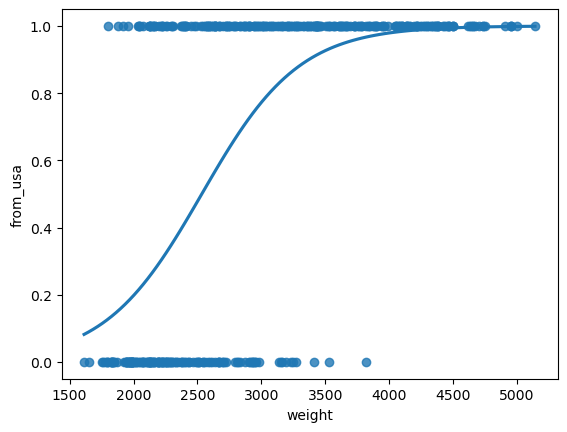

In [57]:
sns.regplot(x=mpg["weight"], y=mpg["origin"].eq("usa").rename("from_usa"),
            logistic=True, ci = None)

## <a id = 'resid'> residplot</a>
Not always a `linear regression` can be used. A quick way to see this, is by using the `sns.residplot()` function.

> It can be a useful tool for **checking whether the simple regression model is appropriate** for a dataset. `sns.residplot()` fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, **these values should be randomly scattered around y = 0**:

In [59]:
anscombe = sns.load_dataset("anscombe")
anscombe.head(12)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


Text(0.5, 1.0, 'e.g NOT OK to use linear regression')

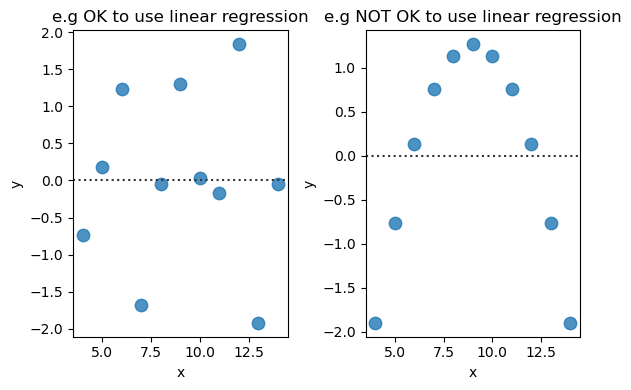

In [71]:
fig, ax = plt.subplots(1, 2 , layout = 'tight', figsize = (6, 4))

sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80}, ax = ax[0])
ax[0].set_title('e.g OK to use linear regression')

sns.residplot(data=anscombe.query("dataset == 'II'"), x="x", y="y", 
              scatter_kws={"s": 80}, ax = ax[1])

ax[1].set_title('e.g NOT OK to use linear regression')

### order
We've just seen an example where linear regression is *OK* and another example where it is *not OK*. Let's take a look at the actual estimation.

Text(0.5, 1.0, 'When it is OK')

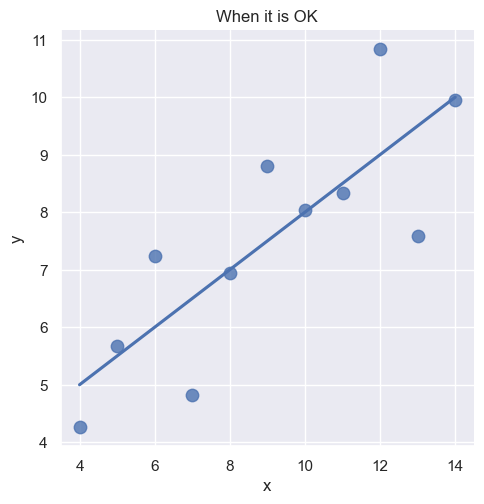

In [74]:
sns.set_theme(style = 'darkgrid')
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})

plt.title('When it is OK')

Text(0.5, 1.0, 'When it is OK')

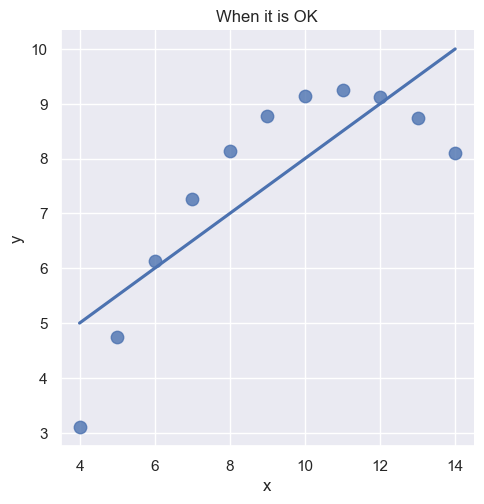

In [75]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

plt.title('When it is not OK')

Notice that it is the **exact same line** the model is using to fit our data for both sets of data. Nevertheless, we can see that in the first example, the data is better represented with our fitted line.

The problem with our second set of data is that it draws a curve. For a straigth line, it is very difficult to adjust to our data if it has a *curve shape*. We can fix this by setting an order. 
- This order indicates the order of the polinomic functions that *Seaborn* will use to fit our data set (a straight line has order = 1). 

- In some cases `order = 2` may be enough. In other cases, must be `order = 3`. It depends on how our data is distributed.

>**Note**: The `order` attribute it computationally intensive. Consider using `ci = None` when using it.

Text(0.5, 1.0, 'Now it fits the data')

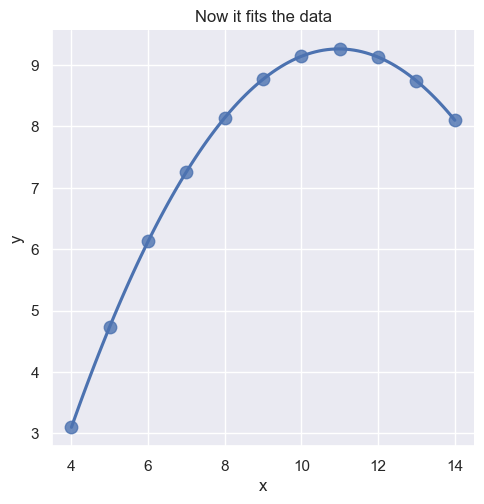

In [76]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80}, order = 2)

plt.title('Now it fits the data')

### robust
Another thing we must consider when plotting our fitted line are the outliers. They may deviate our estimation. Sometimes we don't want to consider these outliers when making our regression model. 

To do so, set `robus = True`.

>**Note**: `robust` is computationally intensive. You may want to consider `ci = None` when using it.

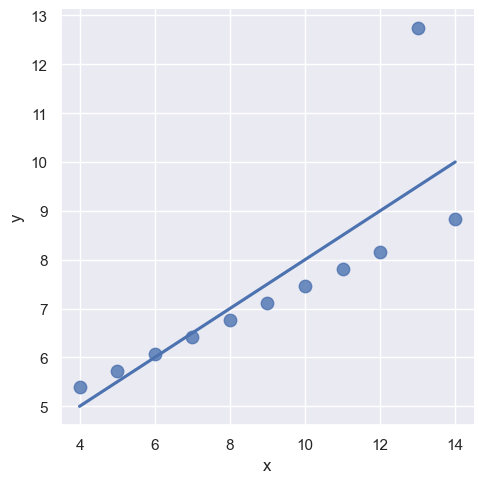

In [78]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80})

plt.show('robust set to False (default)')

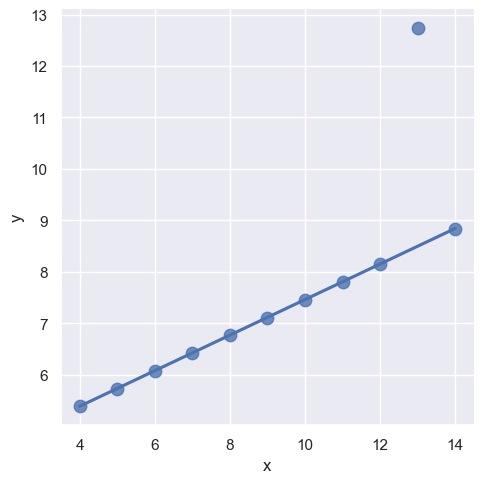

In [79]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

### hue
We know from past notebooks that hue plots a $3^{rd}$ variable into our 2-dimensional plot.

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is **“how does the relationship between these two variables change as a function of a third variable?”**.

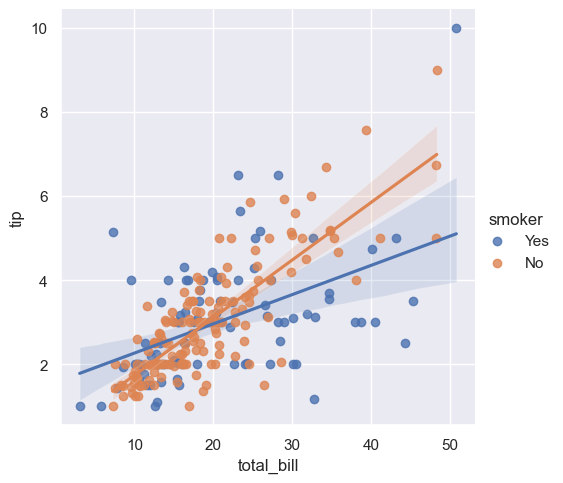

In [80]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

>**Note**: An important difference between `regplot()` and `lmplot()` is that the former doesn't have the `hue` attribute. 

<p style="text-align:center"><b>This notebook has been done by:</b></p>
<p style="text-align:center"><i>Javier Coque</i></p>
<p style="text-align:center"><i>University of U-tad: Double Degree in software engineering and computational mathematics</i></p>

LinkedIn: <a href="https://www.linkedin.com/in/javier-coque-92b934278/">Javier Coque</a>